## Estimation of number of minimum required landmark

This notebook outlines our analysis to estimate the minimum number of required landmarks in each data set. We sometimes choose to chart more landmarks than the lower bound. There are two main reasons for this: (i) spatial symmetries, when samples posses internal symmetry identification of $N$ suitable landmarks in one part of this symmetric structure, we immediately have $2N$ landmark in the whole tissue; (ii) sometimes the landmarks are hard to pin-point exactly, and we thus attempt to correct for eventual errors by introducing more landmarks, making the transfer less dependent on the correctness of each landmark.

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import scanpy as sc

import os.path as osp
import os
from PIL import Image

import anndata as ad
import pandas as pd
import sys

import eggplant as eg


In [23]:
PLOT_RES_DIR = "../../res/analysis/n-lmk-evaluation"
DATA_RES_DIR = "../../res/references/vars/est-lmk"

KNEEDLE_S_PARAM = 1
SAVE_MODE = True

### MOB (Mouse Olfactory Bulb)

In [ ]:
sample_name = "mob"

In [ ]:
MOB_PTH = "../data/mob/charted/Rep10_MOB.h5ad"

In [3]:
adata = ad.read_h5ad(MOB_PTH)

In [4]:
res = eg.fun.estimate_n_lanmdarks(dict(Rep10_MOB= adata),
                                  n_max_lmks=20,
                                  subsample = None,
                                  n_epochs=1000,
                                  n_evals=10,
                                  device="gpu",
                                  verbose = True,
                                  kneedle_s_param=KNEEDLE_S_PARAM,
                                 )

[Processing] :: Sample : Rep10_MOB (1/1)


/home/alma/.local/lib/python3.7/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
Eval. 18 lmks :: 100%|██████████| 1000/1000 [00:06<00:00, 150.93it/s]


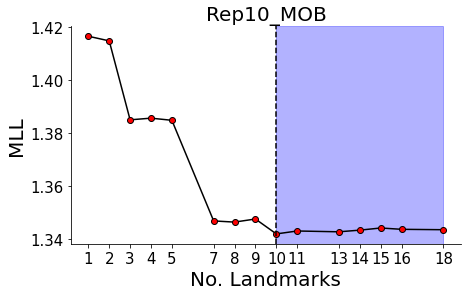

In [7]:
fig,ax = eg.pl.landmark_diagnostics(res,return_figure = True)
if SAVE_MODE:
    fig.savefig(osp.join(PLOT_RES_DIR,"est-lmk-{}.png".format(sample_name)),
                bbox_inches = "tight")
    with open(osp.join(DATA_RES_DIR,"est-lmk-{}".format(sample_name)),"w+") as f:
        f.write(str(list(res[2].values())[0]))

## Heart Data

In [17]:
HEART_PTH = "../data/human-developmental-heart/curated/V10F24-105_A1.h5ad"
adata = ad.read_h5ad(HEART_PTH)
res = eg.fun.estimate_n_lanmdarks(dict(dhA= adata),
                                  n_max_lmks=20,
                                  subsample = None,
                                  n_epochs=1000,
                                  n_evals=10,
                                  device="gpu",
                                  verbose = True,
                                  kneedle_s_param=KNEEDLE_S_PARAM,
                                 )

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


[Processing] :: Sample : dhA (1/1)


Eval. 20 lmks :: 100%|██████████| 1000/1000 [02:27<00:00,  6.76it/s]


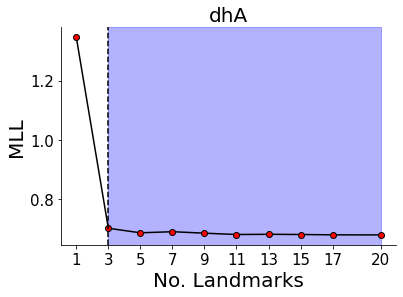

In [20]:
fig,ax = eg.pl.landmark_diagnostics(res,return_figure=True)
if SAVE_MODE:
    fig.savefig(osp.join(PLOT_RES_DIR,"est-lmk-{}.png".format(sample_name)),
                bbox_inches = "tight")
    with open(osp.join(DATA_RES_DIR,"est-lmk-{}".format(sample_name)),"w+") as f:
        f.write(str(list(res[2].values())[0]))

## Mouse Hippocampus

In [ ]:
sample_name = "mouse-hippocampus"

In [ ]:
MOUSE_HIPPO_PATH = "../data/mouse-hippocampus/curated/hippo-visium.h5ad"
adata = ad.read_h5ad(MOUSE_HIPPO_PATH)

In [12]:
res = eg.fun.estimate_n_lanmdarks(dict(Mouse_Hippocampus = adata),
                                  n_max_lmks=20,
                                  subsample = None,
                                  n_epochs=1000,
                                  n_evals=10,
                                  device="gpu",
                                  verbose = True,
                                  kneedle_s_param=KNEEDLE_S_PARAM,
                                 )

[Processing] :: Sample : mouse_hippo_visium (1/1)


Eval. 20 lmks :: 100%|██████████| 1000/1000 [02:46<00:00,  6.02it/s]


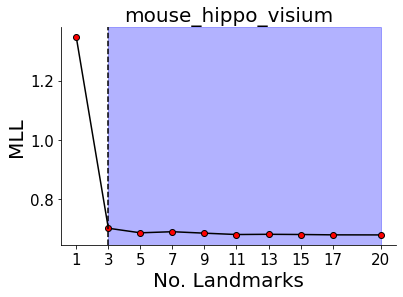

In [16]:
fig,ax = eg.pl.landmark_diagnostics(res,return_figure=True)
if SAVE_MODE:
    fig.savefig(osp.join(PLOT_RES_DIR,"est-lmk-{}.png".format(sample_name)),
                bbox_inches = "tight")
    with open(osp.join(DATA_RES_DIR,"est-lmk-{}".format(sample_name)),"w+") as f:
        f.write(str(list(res[2].values())[0]))

## Human Breast Cancer

In [ ]:
sample_name = "human-breast-cancer"

In [ ]:
HUMAN_BC_PATH = "../data/human-breast-cancer/curated/bcA.h5ad"
adata = ad.read_h5ad(HUMAN_BC_PATH)

In [ ]:
res = eg.fun.estimate_n_lanmdarks(dict(Mouse_Hippocampus = adata),
                                  n_max_lmks=20,
                                  subsample = None,
                                  n_epochs=1000,
                                  n_evals=10,
                                  device="gpu",
                                  verbose = True,
                                  kneedle_s_param=KNEEDLE_S_PARAM,
                                 )

fig,ax = eg.pl.landmark_diagnostics(res,return_figure=True)

if SAVE_MODE:
    fig.savefig(osp.join(PLOT_RES_DIR,"est-lmk-{}.png".format(sample_name)),
                bbox_inches = "tight")
    
    with open(osp.join(DATA_RES_DIR,"est-lmk-{}".format(sample_name)),"w+") as f:
        f.write(str(list(res[2].values())[0]))